<a href="https://colab.research.google.com/github/yseoyoung/python/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9D%91%EC%9A%A9_(2)_%2B_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_FIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 파이참 설치 및 모듈 설치(방법만 알려주심)  
  - 세팅 → Project:이름 → Python Interpreter → +버튼 ‘matplotlib’ 검색 후 설치  
- Json, XML to Pandas
- 워드 클라우드
- 타이타닉.csv 파일 분석 및 시각화

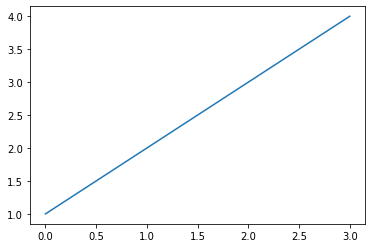

In [ ]:
#파이참에서 코드 실행해보기

import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.show()

#JSON 데이터를 Pandas 로 처리

In [ ]:
import urllib.request

In [ ]:
url = 'https://dapi.kakao.com/v3/search/book' # OpenAPI 서비스 제공 URL
target_param = "target=title" # 전달 인자
page_param = "page=2"         # 전달 인자
query_in = input("검색 질의: ")
query_param = "query=" + urllib.parse.quote(query_in) # utf-8로 인코딩 (open API에서는 표준화해서 서비스)
query_str = url + '?' + target_param + '&' + query_param + '&' + page_param # 쿼리 문자열

print("요청 url:",query_str)
print()
print(">>검색결과")

#urllib.request.urlopen(query_str) #HTTP Error 401: Unauthorized 인증키를 가지고 있지 않으므로 권한이 없음
request = urllib.request.Request(query_str) # 서비스 요청에 사용할 개체를 생성
request.add_header("Authorization", "KakaoAK ee4c503f3cfa3a8198333f0f803f8be3")
response = urllib.request.urlopen(request) # 웹 서버에 요청
res = response.read().decode('utf-8')
print(res) #JSON 방식으로 반환

검색 질의: python
요청 url: https://dapi.kakao.com/v3/search/book?target=title&query=python&page=2

>>검색결과
{"documents":[{"authors":["최용"],"contents":"『파이썬(Python) 3』은 쉽고 강력한 프로그래밍 언어인 파이썬에 대한 책이다. 파이썬의 기초, 시쿨리, 안드로이드 환경에서의 파이썬 스크립팅, 파이썬을 사용한 문자열 다루기, 다양한 파이썬 패키지의 소개와 다루는 법, 자이썬 등을 다룬다.","datetime":"2014-02-12T00:00:00.000+09:00","isbn":"1185578005 9791185578002","price":25000,"publisher":"인피니티북스","sale_price":22500,"status":"정상판매","thumbnail":"https://search1.kakaocdn.net/thumb/R120x174.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Flbook%2Fimage%2F1618094%3Ftimestamp%3D20220303210610","title":"파이썬(Python) 3(예제 중심의)","translators":[],"url":"https://search.daum.net/search?w=bookpage\u0026bookId=1618094\u0026q=%ED%8C%8C%EC%9D%B4%EC%8D%AC%28Python%29+3%28%EC%98%88%EC%A0%9C+%EC%A4%91%EC%8B%AC%EC%9D%98%29"},{"authors":["Michael Beyeler","Joseph Howse","Prateek Joshi"],"contents":"","datetime":"2017-09-01T00:00:00.000+09:00","isbn":"1787125491 9781787125490","price":57000,"publisher":"Packt Publishing"

In [ ]:
import json
jd = json.loads(res)
print(jd) # 위의 결과 = json data 출력

{'documents': [{'authors': ['최용'], 'contents': '『파이썬(Python) 3』은 쉽고 강력한 프로그래밍 언어인 파이썬에 대한 책이다. 파이썬의 기초, 시쿨리, 안드로이드 환경에서의 파이썬 스크립팅, 파이썬을 사용한 문자열 다루기, 다양한 파이썬 패키지의 소개와 다루는 법, 자이썬 등을 다룬다.', 'datetime': '2014-02-12T00:00:00.000+09:00', 'isbn': '1185578005 9791185578002', 'price': 25000, 'publisher': '인피니티북스', 'sale_price': 22500, 'status': '정상판매', 'thumbnail': 'https://search1.kakaocdn.net/thumb/R120x174.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Flbook%2Fimage%2F1618094%3Ftimestamp%3D20220303210610', 'title': '파이썬(Python) 3(예제 중심의)', 'translators': [], 'url': 'https://search.daum.net/search?w=bookpage&bookId=1618094&q=%ED%8C%8C%EC%9D%B4%EC%8D%AC%28Python%29+3%28%EC%98%88%EC%A0%9C+%EC%A4%91%EC%8B%AC%EC%9D%98%29'}, {'authors': ['Michael Beyeler', 'Joseph Howse', 'Prateek Joshi'], 'contents': '', 'datetime': '2017-09-01T00:00:00.000+09:00', 'isbn': '1787125491 9781787125490', 'price': 57000, 'publisher': 'Packt Publishing', 'sale_price': 57000, 'status': '정상판매', 'thumbnail': 'https://search1.ka

In [ ]:
import pandas as pd
df = pd.json_normalize(jd['documents']) # Pandas DataFrame 으로 변화 가능
df

,authors,contents,datetime,isbn,price,publisher,sale_price,status,thumbnail,title,translators,url
0,[최용],『파이썬(Python) 3』은 쉽고 강력한 프로그래밍 언어인 파이썬에 대한 책이다....,2014-02-12T00:00:00.000+09:00,1185578005 9791185578002,25000,인피니티북스,22500,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬(Python) 3(예제 중심의),[],https://search.daum.net/search?w=bookpage&book...
1,"[Michael Beyeler, Joseph Howse, Prateek Joshi]",,2017-09-01T00:00:00.000+09:00,1787125491 9781787125490,57000,Packt Publishing,57000,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Opencv: Computer Vision Projects with Python,[],https://search.daum.net/search?w=bookpage&book...
2,[프랑소와 숄레],케라스 창시자이자 구글 딥러닝 연구원인 저자는 ‘인공 지능의 민주화’를 강조한다. ...,2018-10-22T00:00:00.000+09:00,1160505977 9791160505979,33000,길벗,29700,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,케라스 창시자에게 배우는 딥러닝(Deep Learning with Python),[박해선],https://search.daum.net/search?w=bookpage&book...
3,"[창병모, 유석종, 이상규]",이 교재는 프로그래밍을 처음 배우는 학생들을 대상으로 C 언어나 Java 언어를 배...,2017-01-17T00:00:00.000+09:00,1159090289 9791159090288,18000,교보문고,17280,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Python 프로그래밍의 이해,[],https://search.daum.net/search?w=bookpage&book...
4,[이진영],가운데 프로그래밍 언어를 이용하여 프로그래밍 개념을 정립하고 이를 바탕으로 문제해결...,2017-08-25T00:00:00.000+09:00,8994044965 9788994044965,21000,서현사,21000,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Python 실습으로 기초부터,[],https://search.daum.net/search?w=bookpage&book...
5,"[Bruce Peter, Bruce Andrew, Gedeck Peter]",statistics rarely cover the topic from a data ...,2020-06-09T00:00:00.000+09:00,149207294X 9781492072942,95000,O'Reilly Media,76000,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Practical Statistics for Data Scientists,[],https://search.daum.net/search?w=bookpage&book...
6,[조준모],이를 가공하여 분석할 수 있는 빅데이터 분석기술이 필요하다. 이를 위해 현재 각광을...,2021-02-25T00:00:00.000+09:00,118557879X 9791185578798,26000,인피니티북스,26000,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,빅데이터분석 및 인공지능(Python으로 시작하는)(개정판),[],https://search.daum.net/search?w=bookpage&book...
7,"[이경택, 방성수, 안상준]","이 책은 딥러닝 기술에 초점을 두고 딥러닝을 구현하기 위해 파이썬을 이용하는데, 머...",2020-10-08T00:00:00.000+09:00,8956748578 9788956748573,25000,정보문화사,22500,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),[],https://search.daum.net/search?w=bookpage&book...
8,"[폴 데이텔, 하비 데이텔]",미 피어슨(Pearson) 사 특유의 내용의 깊이가 상당한 프로그래밍 언어 고급서 ...,2021-12-23T00:00:00.000+09:00,8931556829 9788931556827,38000,성안당,34200,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,프로그래머를 위한 Python,[안진섭],https://search.daum.net/search?w=bookpage&book...
9,[박응용],문과생도 중고등학생도 직장인도 프로그래밍에 눈뜨게 만든 바로 그 책이 전면 개정판으...,2019-06-20T00:00:00.000+09:00,1163030910 9791163030911,18800,이지스퍼블리싱,16920,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Do it! 점프 투 파이썬,[],https://search.daum.net/search?w=bookpage&book...


#XML 데이터를 Pandas 로 처리
https://pandas.pydata.org/docs/reference/api/pandas.read_xml.html

In [ ]:
url = 'https://openapi.naver.com/v1/search/book.xml' #json 아닌 xml형태로 응답
query_in = input("검색 질의: ") #상세검색이 아닌 그냥 전체 검색
query_param = "query=" + urllib.parse.quote(query_in)
query_str = url + '?' + query_param

print("요청 url:",query_str)
print()
print(">>검색결과")

request = urllib.request.Request(query_str) 
request.add_header("X-Naver-Client-Id", "N2a4UtfAI1_PbVZwB1Of")
request.add_header("X-Naver-Client-Secret", "MbVNScVQ6j")
response = urllib.request.urlopen(request)
res = response.read().decode('utf-8')
print(res)

검색 질의: python
요청 url: https://openapi.naver.com/v1/search/book.xml?query=python

>>검색결과
<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - book ::'python'</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Thu, 03 Mar 2022 10:14:22 +0900</lastBuildDate><total>6941</total><start>1</start><display>10</display><item><title>CODING BASICS &lt;b&gt;PYTHON&lt;/b&gt; (파이썬)</title><link>http://book.naver.com/bookdb/book_detail.php?bid=21508274</link><image>https://bookthumb-phinf.pstatic.net/cover/215/082/21508274.jpg?type=m1&amp;udate=20220208</image><author>김상민|장성식|김일태</author><price>20000</price><discount>18000</discount><publisher>렉스미디어닷넷</publisher><pubdate>20220210</pubdate><isbn>8959604216 9788959604210</isbn><description>파이썬으로 다지는 프로그래밍의 기초ㆍ 다양한 예제를 활용하여 초보자도 쉽게 프로그래밍의 기본을 익힐 수 있는 파이썬 입문서입니다.ㆍ 문법을 사전식으로 나열하지 않고 기능적인 프로그램을 하나씩 완성하면서 익힐 수 있게 구성했습니다.ㆍ 단계별로 완성하는 장별 예제 및 연습문제를 바탕으로... </description><

In [ ]:
df = pd.read_xml(res,xpath=".//item") # 가져오고 싶은 사항 작성 -> 구조를 전체적으로 보고 싶다면, xml 파일을 생성하여 웹으로 확인해보기
df

,title,link,image,author,price,discount,publisher,pubdate,isbn,description
0,CODING BASICS <b>PYTHON</b> (파이썬),http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/215/...,김상민|장성식|김일태,20000,18000.0,렉스미디어닷넷,20220210,8959604216 9788959604210,파이썬으로 다지는 프로그래밍의 기초ㆍ 다양한 예제를 활용하여 초보자도 쉽게 프로그래...
1,<b>Python</b>을 이용한 개인화 추천 시스템,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/166/...,임일,18000,17640.0,청람,20200825,8959727660 9788959727667,현재 추천 알고리즘으로 가장 널리 사용되는 협업 필터링(COLLABORATIVE F...
2,"파이썬으로 배우는 게임 개발 (닷잇 액션, 탄막 슈팅, 맵 에티터,장애물 피하기,실전편)",http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/173/...,히로세 츠요시,30000,27000.0,제이펍,20201120,119066545X 9791190665452,『파이썬으로 배우는 게임 개발: 실전편』은 입문편보다 보다 수준 높은 게임 개발 테...
3,프로그래머를 위한 <b>Python</b>,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/213/...,폴 데이텔|하비 데이텔,38000,34200.0,성안당,20211223,8931556829 9788931556827,사의 ‘<b>PYTHON</b> FOR PROGRAMMERS’가 오랜만에 번역판으로...
4,처음 만나는 AI 수학 with <b>Python</b> (한 권으로 배우는 인공지...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/177/...,아즈마 유키나가,23000,20700.0,영진닷컴,20210115,8931463375 9788931463378,인공지능을 공부하는데 필요한 기초 수학개념을 한 권에 모았다!〈처음 만나는 AI 수...
5,きれいな<b>Python</b>プログラミング,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/215/...,AlSweigart 岡田 佑一,46580,46140.0,マイナビ出版,20220228,4839977402 9784839977405,None
6,<b>Python</b>最速デ-タ收集術,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/214/...,淸水 義孝,25320,25320.0,技術評論社,20220228,4297126419 9784297126414,None
7,<b>Python</b> for Cybersecurity,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/214/...,Howard E. Poston|III,22000,NaN,Wiley,20220201,1119850657 9781119850656,Discover an up-to-date and authoritative explo...
8,<b>Python</b>으로 배우는 문제해결과 인공지능,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/180/...,김현정|오경선,23000,22540.0,인피니티북스,20210225,1185578811 9791185578811,컴퓨팅 사고는 자신의 영역에 컴퓨터과학 원리와 개념을 활용하여 논리적으로 풀어낼 수...
9,Introduction to Digital Music with <b>Python</...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/219/...,"Horn, Michael|West, Melanie|Roberts, Cameron",64960,58460.0,FocalPress,20220207,0367470829 9780367470821,None


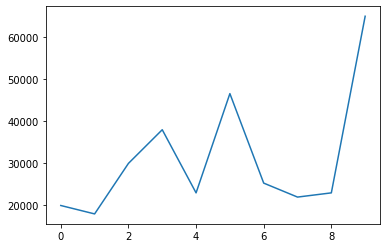

In [ ]:
import matplotlib.pyplot as plt
df.price.plot() # 위의 검색 결과의 가격을 그래프로 시각화 가능
plt.show()

In [ ]:
des_str = df.description[0] # 텍스트도 추출 가능
# 해당 자료들에서 우리가 원하는 텍스트만 추출하는 것 = '텍스트 마이닝'(Text Mining)

#워드 클라우드
텍스트 마이닝의 주제 중 하나. 주요 키워드의 추출  
-> 우리에게 필요한 것 : 영문 알파벳, 한글, 숫자 (특수기호 등등 X)

In [ ]:
demo_str = "abc 123 cas$ asd# cr"
target_str = ""
print("방법1===================")
for ch in demo_str:
  if ch.isalnum() or ch.isspace(): # isalnum() : 문자나 숫자인지 검사, isspace() : 공백이 포함되어 있으면 True, 아니면 False
    target_str = target_str + ch
print(target_str)

print("\n방법2===================")
target_str = "".join(char for char in demo_str if (char.isalnum() or char.isspace())) # 한 줄 코드
print(target_str)

방법1===================
abc 123 cas asd cr

방법2===================
abc 123 cas asd cr


In [ ]:
filter_str = "".join( char for char in des_str if(char.isalnum() or char.isspace()) and char !='ㆍ')
print(filter_str)
print("======온전한 글자만 추출 완료=======\n")

words = filter_str.split(' ') # 공백 기준으로 분할
s = pd.Series(words)
s.value_counts() # 각 단어의 분포 수를 셀 수 있다

파이썬으로 다지는 프로그래밍의 기초 다양한 예제를 활용하여 초보자도 쉽게 프로그래밍의 기본을 익힐 수 있는 파이썬 입문서입니다 문법을 사전식으로 나열하지 않고 기능적인 프로그램을 하나씩 완성하면서 익힐 수 있게 구성했습니다 단계별로 완성하는 장별 예제 및 연습문제를 바탕으로
======온전한 글자만 추출 완료=======



프로그래밍의    2
수         2
익힐        2
파이썬으로     1
구성했습니다    1
프로그램을     1
하나씩       1
완성하면서     1
있게        1
단계별로      1
않고        1
완성하는      1
장별        1
예제        1
및         1
연습문제를     1
기능적인      1
사전식으로     1
나열하지      1
다지는       1
문법을       1
입문서입니다    1
파이썬       1
있는        1
기본을       1
쉽게        1
초보자도      1
활용하여      1
예제를       1
다양한       1
기초        1
바탕으로      1
dtype: int64

In [ ]:
from wordcloud import WordCloud

In [ ]:
src = """
Python is an easy to learn, powerful programming language. It has efficient high-level data structures and a simple but effective approach to object-oriented programming. Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development in many areas on most platforms.

The Python interpreter and the extensive standard library are freely available in source or binary form for all major platforms from the Python web site, https://www.python.org/, and may be freely distributed. The same site also contains distributions of and pointers to many free third party Python modules, programs and tools, and additional documentation.

The Python interpreter is easily extended with new functions and data types implemented in C or C++ (or other languages callable from C). Python is also suitable as an extension language for customizable applications.
"""

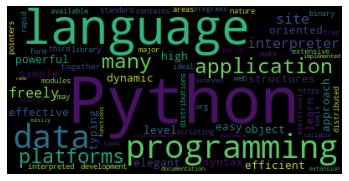

In [ ]:
wc = WordCloud()
wc.generate(src) # 형태소 별로 분리하여 빈도수가 높은 것은 면적을 크게 설정하여 시각화
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
!sudo apt-get install -y fonts-nanum # 한글 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm # 워드 클라우드에 한글 폰트를 적용하기 위하여 경로를 알아야 한다.
sf = fm.findSystemFonts()
[f for f in sf if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf']

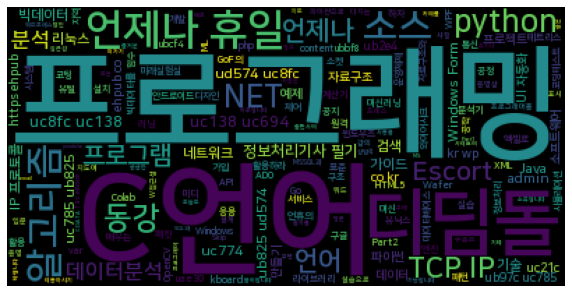

In [ ]:
from bs4 import BeautifulSoup
url = 'https://ehpub.co.kr' # 웹크롤링 할 URL

response = urllib.request.urlopen(url) # url 그대로 요청
res = response.read().decode('utf-8')

hre = BeautifulSoup(res,'html.parser')
#print(hre.body.text) # vody 안에 있는 text 내용만 가져오기

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareB.ttf')
wc.generate(hre.body.text)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

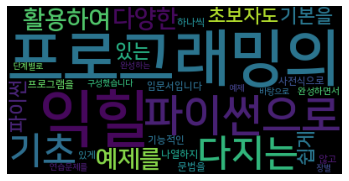

In [ ]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareB.ttf')
wc.generate(filter_str)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)  
- tf(d,t) : 특정 문서 d 에서의 특정 단어 t 의 등장 횟수
- df(t) : 특정 단어 t가 등장한 문서의 수.  

위에 따라 가중치를 두어 점수를 매긴다. 시맨틱 검색에 가장 기본이 되는 알고리즘이다.

# train_titanic.csv 파일 내용 분석 실습 

1. 주어진 자료의 인원, 생존자, 사망자는 몇 명인가?

2. 생존자와 사망자를 Pie 그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오.

3. 결측데이터가 있는 컬럼들을 조사하시오.

4. Pclass의 종류별로 분포를 Pie 그래프로 나타내시오.

5. Pclass의 종류별로 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

6. Name 컬럼에 탑승자를 부르는 호칭을 Mr, Mrs, Miss, Master, Dr, ETC로 나누어 분포를 파이 그래프로 나타내시오.

7. 앞에서 구분한 호칭에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

8. 성별로 분포를 파이 그래프로 나타내시오.

9. 성별에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

10. 나이를 5살 범위로 17단계로(0살 이상 ~ 5살 미만, 5살 이상 ~ 10살 미만,...,80 ~ 85)로 나누어 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 평균나이로 처리하시오.)

11. 나이를 구분한 단계에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

12. SibSp 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

13. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

14. Parch 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

15. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

16. 승선한 항구(Embarked 컬럼)에 따른 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 'N'으로 마킹하시오.)

17. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

In [ ]:
path = '/content/drive/MyDrive/Python Files/train_titanic.csv'
data = pd.read_csv(path)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print('train data shape: ', data.shape)
print('----------[train infomation]----------')
print(data.info())

train data shape:  (891, 12)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# 1. 주어진 자료의 인원, 생존자, 사망자는 몇 명인가?
sur_data = data['Survived']
surv = data['Survived'].value_counts()

#풀이
print("사망자 수:",surv[0],"명, 생존자 수:",surv[1],"명")
print()

#강사 해설
print(f"승선 인원: {surv.count()}명, 사망자 수: {surv.values[0]}명, 생존자 수: {surv.values[1]}명")

사망자 수: 549 명, 생존자 수: 342 명

승선 인원: 2명, 사망자 수: 549명, 생존자 수: 342명


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


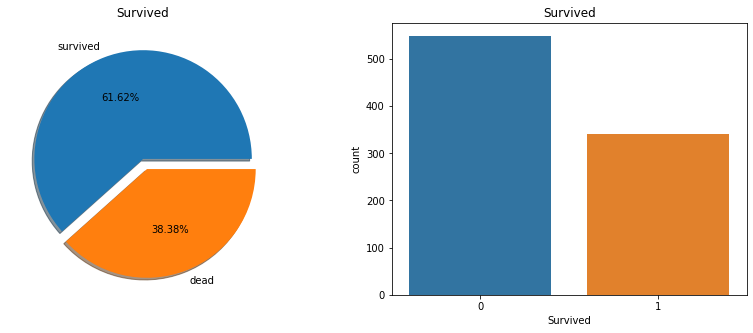

In [ ]:
# 2. 생존자와 사망자를 Pie 그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오.

#풀이
labels = ['survived', 'dead']
f,ax = plt.subplots(1,2,figsize=(14,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0], labels=labels, shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
# 3. 결측데이터가 있는 컬럼들을 조사하시오.

print('----------[train infomation]----------')
print(data.info())
print("\n==> Age, Cabin,Embarked 에 결측 데이터 존재")

----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

==> Age, Cabin,Embarked 에 결측 데이터 존재


In [ ]:
data['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [ ]:
data['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [ ]:
data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

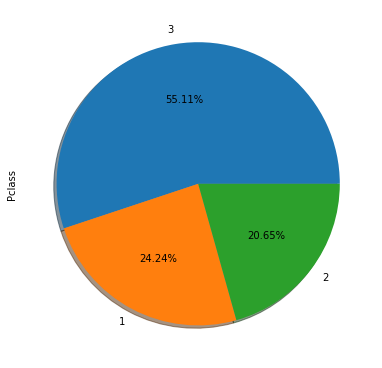

In [ ]:
# 4. Pclass의 종류별로 분포를 Pie 그래프로 나타내시오.

#풀이
fig, ax = plt.subplots(figsize=(12,5), constrained_layout=True)
data['Pclass'].value_counts().plot.pie(shadow=True, autopct='%.2f%%')
plt.show()

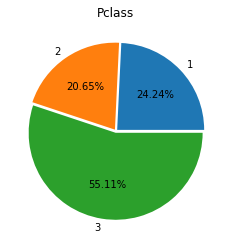

In [ ]:
#강사 해설
#value_counts()는 빈도 순으로 정렬되므로 index순으로 정렬시켜준다
labels = ['1','2','3']
dvc = data.Pclass.value_counts().sort_index()
plt.pie(dvc.values, labels=labels, autopct="%.2f%%", explode=[0.02,0.02,0.02])
plt.title("Pclass")
plt.show()

In [ ]:
import numpy as np

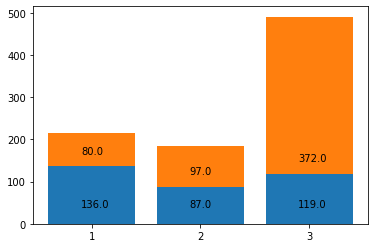

In [ ]:
# 5. Pclass의 종류별로 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

pdata = data.Pclass
cn = len(pdata.unique())
pc_alive_arr = np.zeros(cn) # 초기값 0 설정 -> 카운팅을 넣어줄 것
pc_dead_arr = np.zeros(cn)

for index in range(len(pdata)):
  pi = pdata[index]-1 # Pclass는 1,2,3 이므로 -1 하여 인덱스값 0,1,2로 변환
  if sur_data[index]==0: #사망자인 경우 카운트 +1
    pc_dead_arr[pi]+=1
  else: #생존자인 경우 카운트 +1
    pc_alive_arr[pi]+=1
#pc_alive_arr, pc_dead_arr

labels = ['1','2','3']
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr)
for i in range(cn):
  plt.annotate(str(pc_alive_arr[i]),(-0.1+i,40))
  plt.annotate(str(pc_dead_arr[i]),(-0.1+i,pc_alive_arr[i]+30))
plt.show()

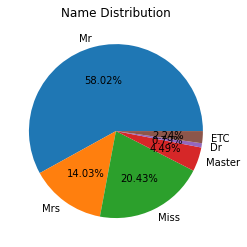

In [ ]:
## 6. Name 컬럼에 탑승자를 부르는 호칭을 Mr, Mrs, Miss, Master, Dr, ETC로 나누어 분포를 파이 그래프로 나타내시오.

names_values = ['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'ETC']
def get_name_index(name):
  first,second = name.split(',') # 콤마 기준 뒷부분 사용
  foos = second.split('.') # 점 기준 앞부분 사용
  tn = foos[0].replace(' ','') # 공백 제거
  for index,nv in enumerate(names_values):
    if nv == tn: # 직접 이름에서 뽑은 값 tn과 names_values의 요소값이 같으면 해당 인덱스값을 반환
      return index
  return 5 # 없으면 기타

n_cnts = np.zeros(6) # 인원 수 초기화
for i,name in enumerate(df.Name):
  ni = get_name_index(name)
  n_cnts[ni]+=1
#print(n_cnts)
#[517. 125. 182.  40.   7.  20.]

plt.pie(n_cnts,labels=names_values,autopct="%.2f%%")
plt.title("Name Distribution")
plt.show()

In [ ]:
n_data = data.Name

In [ ]:
# 추가 강의

def get_call_name(name):
  _,s = name.split(',')
  foos = s.split('.')
  return foos[0].replace(' ','')
for name in n_data:
  if get_call_name(name) == "Mr":
    print(".")

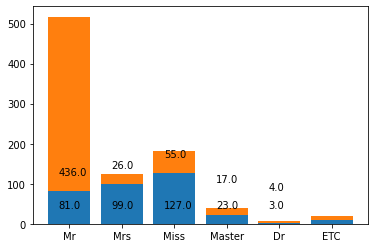

In [ ]:
# 7. 앞에서 구분한 호칭에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

pn_alive_arr = np.zeros(6) #인원수 초기화
pn_dead_arr = np.zeros(6)
for i,name in enumerate(df.Name):
  ni = get_name_index(name)
  if sur_data[i] == 0:
    pn_dead_arr[ni]+=1
  else:
    pn_alive_arr[ni]+=1
#pn_alive_arr, pn_dead_arr
#(array([ 81.,  99., 127.,  23.,   3.,   9.]),
# array([436.,  26.,  55.,  17.,   4.,  11.]))

plt.bar(names_values, pn_alive_arr)
plt.bar(names_values, pn_dead_arr, bottom=pn_alive_arr)
# 어노테이션 (화살표 더 추가해볼 수 있음)
for i in range(5):
  plt.annotate(str(pn_alive_arr[i]),(-0.2+i,40))
  if pn_alive_arr[i]<40:
    plt.annotate(str(pn_dead_arr[i]),(-0.2+i,pn_alive_arr[i]+80))
  else:
    plt.annotate(str(pn_dead_arr[i]),(-0.2+i,pn_alive_arr[i]+40))
plt.show()

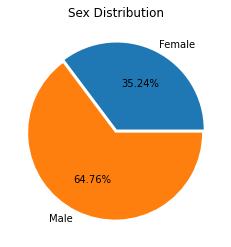

In [ ]:
# 8. 성별로 분포를 파이 그래프로 나타내시오.

svc = data.Sex.value_counts().sort_index()
plt.pie(svc.values, labels=['Female','Male'], autopct="%.2f%%",explode=[0.02,0.02])
plt.title("Sex Distribution")
plt.show()

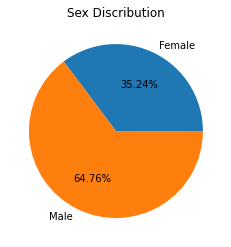

In [ ]:
#강사 풀이

sex_values = ['Female','Male']
def get_sex_index(sex):
  if sex == 'female':
    return 0
  return 1

s_cnts = np.zeros(2)
for i,sex in enumerate(data.Sex):
  si = get_sex_index(sex)
  s_cnts[si]+=1

plt.pie(s_cnts,labels=sex_values,autopct="%.2f%%")
plt.title("Sex Discribution")
plt.show()

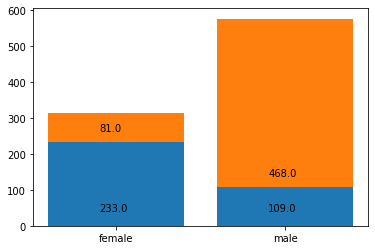

In [ ]:
# 9. 성별에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)
import numpy as np
sdata = data.Sex
sn = len(sdata.unique())
ps_alive_arr = np.zeros(sn)
ps_dead_arr = np.zeros(sn)

for index in range(len(sdata)):
  if sdata[index] == 'female':
    si = 0
  else:
    si = 1
  if sur_data[index]==0: #사망자인 경우 카운트 +1
    ps_dead_arr[si]+=1
  else: #생존자인 경우 카운트 +1
    ps_alive_arr[si]+=1
#pc_alive_arr, pc_dead_arr

labels = ['female','male']
plt.bar(labels,ps_alive_arr)
plt.bar(labels,ps_dead_arr,bottom=ps_alive_arr)
for i in range(sn):
  plt.annotate(str(ps_alive_arr[i]),(-0.1+i,40))
  plt.annotate(str(ps_dead_arr[i]),(-0.1+i,ps_alive_arr[i]+30))
plt.show()

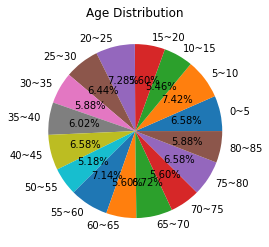

In [ ]:
# 10. 나이를 5살 범위로 16단계로(0~5, 5~10,...,80~85)로 나누어 분포를 조사하여 파이 그래프로 나타내시오.
#     (결측값은 평균나이로 처리하시오.)

#어딘가 많이 잘못된 그래프...
labels=['0~5','5~10','10~15','15~20','20~25','25~30','30~35','35~40','40~45','50~55','55~60','60~65','65~70','70~75','75~80','80~85']
data['Age_cut'] = pd.qcut(data.Age, q=16, labels=labels)
avc = data.Age_cut.value_counts().sort_index()
plt.pie(avc.values, labels=labels, autopct="%.2f%%")
plt.title("Age Distribution")
plt.show()

In [ ]:
#강사 풀이

#data.Age.isnull().value_counts() # 177개의 결측 데이터 확인 -> 평균값으로 넣자
mv = data.Age.mean() # 평균값 구하기
ad = data.Age.fillna(mv) # 결측치를 평균값으로 수정
ad.isnull().value_counts() # 결측 데이터가 평균값으로 들어간 자료

False    891
Name: Age, dtype: int64

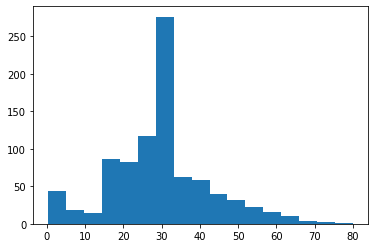

array([ 0.42      ,  5.10117647,  9.78235294, 14.46352941, 19.14470588,
       23.82588235, 28.50705882, 33.18823529, 37.86941176, 42.55058824,
       47.23176471, 51.91294118, 56.59411765, 61.27529412, 65.95647059,
       70.63764706, 75.31882353, 80.        ])

In [ ]:
n, bins, patches = plt.hist(ad,bins=17)
plt.show()
bins # 우리가 요구하는 구간으로 정확히 나뉘지 않음

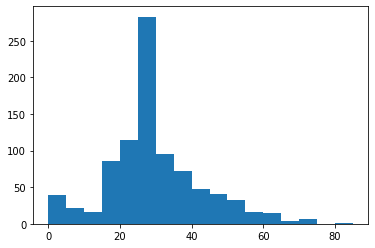

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

In [ ]:
n, _, _ = plt.hist(ad,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]) # bins, patches 는 필요 없으니 _ 로 표시
plt.show()
n #우리가 필요한 것 = 각각 구간에 해당하는 인원 수

In [ ]:
#hist를 모르는 경우 직접 만들어야함

age_values = np.zeros(17)
for i,age in enumerate(ad):
  ai = age//5
  ai = int(ai)
  age_values[ai]+=1
age_values

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

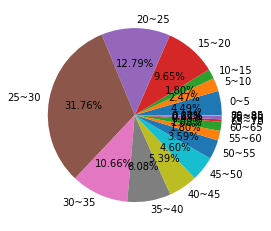

In [ ]:
labels=['0~5','5~10','10~15','15~20','20~25','25~30','30~35','35~40','40~45','45~50','50~55','55~60','60~65','65~70','70~75','75~80','80~85']
plt.pie(age_values,labels=labels,autopct="%.2f%%")
plt.show()

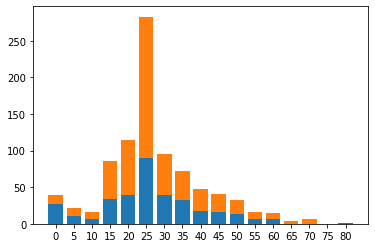

00  ~  5:   40
05  ~ 10:   22
10  ~ 15:   16
15  ~ 20:   86
20  ~ 25:  114
25  ~ 30:  283
30  ~ 35:   95
35  ~ 40:   72
40  ~ 45:   48
45  ~ 50:   41
50  ~ 55:   32
55  ~ 60:   16
60  ~ 65:   15
65  ~ 70:    4
70  ~ 75:    6
75  ~ 80:    0
80  ~ 85:    1


In [ ]:
# 11. 나이를 구분한 단계에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

ps_alive_arr = np.zeros(17)
ps_dead_arr = np.zeros(17)
for index in range(len(ad)):
  ai = ad[index]//5 # float타입이므로
  ai = int(ai) # int로 변환
  
  if sur_data[index]==0: #죽은 승객일 때
    ps_dead_arr[ai]+=1
  else: #생존 승객일 때
    ps_alive_arr[ai]+=1

labels=['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80']
plt.bar(labels,ps_alive_arr)
plt.bar(labels,ps_dead_arr,bottom=ps_alive_arr)
plt.show()

for i in range(17):
  print(f"{i*5:02d}  ~ {(i+1)*5:-2d}:  {age_values[i]:3.0f}")

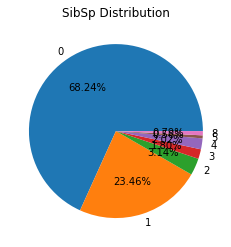

In [ ]:
# 12. SibSp 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.
# SibSp : 함께 탑승한 형제 또는 배우자 수

svc = data.SibSp.value_counts().sort_index()
plt.pie(svc.values, labels=svc.index, autopct="%.2f%%")
plt.title("SibSp Distribution")
plt.show()

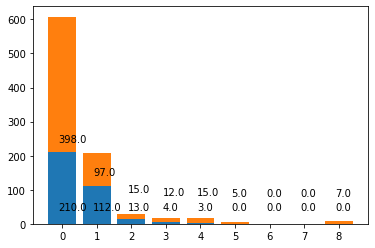

In [ ]:
# 13. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오. (아래:생존자, 위:사망자)

sdata = data.SibSp
sn = 9
sc_alive_arr = np.zeros(sn)
sc_dead_arr = np.zeros(sn)

for index in range(len(sdata)):
  si = sdata[index]
  if sur_data[index]==0:
    sc_dead_arr[si]+=1
  else:
    sc_alive_arr[si]+=1

labels = [str(i) for i in range(9)]
plt.bar(labels,sc_alive_arr)
plt.bar(labels,sc_dead_arr,bottom=sc_alive_arr)
for i in range(sn):
  plt.annotate(str(sc_alive_arr[i]),(-0.1+i,40))
  if sc_alive_arr[i]<40:
    plt.annotate(str(sc_dead_arr[i]),(-0.1+i,sc_alive_arr[i]+80))
  else:
    plt.annotate(str(sc_dead_arr[i]),(-0.1+i,sc_alive_arr[i]+30))
plt.show()

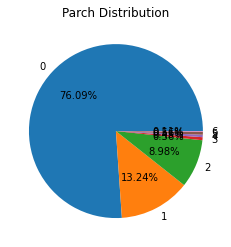

In [ ]:
# 14. Parch 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.
# Parch : 부모와 자식이 있는 승객

pvc = data.Parch.value_counts().sort_index()
plt.pie(pvc.values, labels=pvc.index, autopct="%.2f%%")
plt.title("Parch Distribution")
plt.show()

In [ ]:
pvc = data.Parch.value_counts().sort_index()
pvc

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

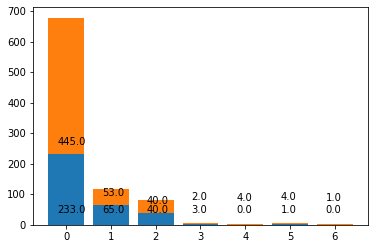

In [ ]:
# 15. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

pdata = data.Parch
sur_data = data['Survived']
pn = 7
pc_alive_arr = np.zeros(pn)
pc_dead_arr = np.zeros(pn)

for index in range(len(pdata)):
  pi = pdata[index]
  if sur_data[index]==0:
    pc_dead_arr[pi]+=1
  else:
    pc_alive_arr[pi]+=1

labels = [str(i) for i in range(7)]
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr)
for i in range(pn):
  plt.annotate(str(pc_alive_arr[i]),(-0.2+i,40))
  if pc_alive_arr[i]<40:
    plt.annotate(str(pc_dead_arr[i]),(-0.2+i,pc_alive_arr[i]+80))
  else:
    plt.annotate(str(pc_dead_arr[i]),(-0.2+i,pc_alive_arr[i]+30))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


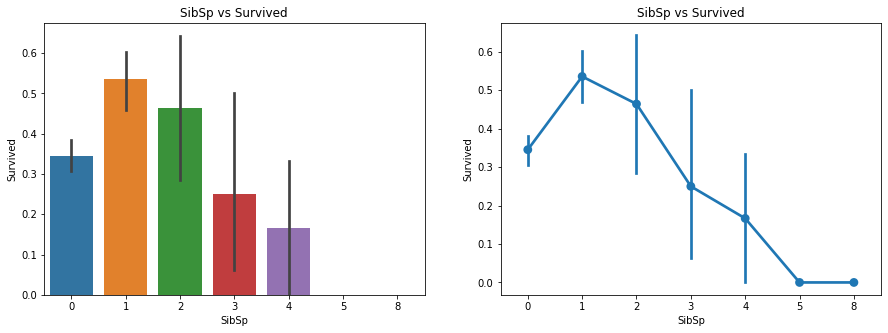

In [ ]:
import seaborn as sns
# sns.factorplot(x,y,hue) : y평균값 그래프. hue로 지정된 필드의 종류만큼 라인이 그려짐.
# 오차율을 표시하기 위한 그래프이므로 활용 목적에 맞게 사용

f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


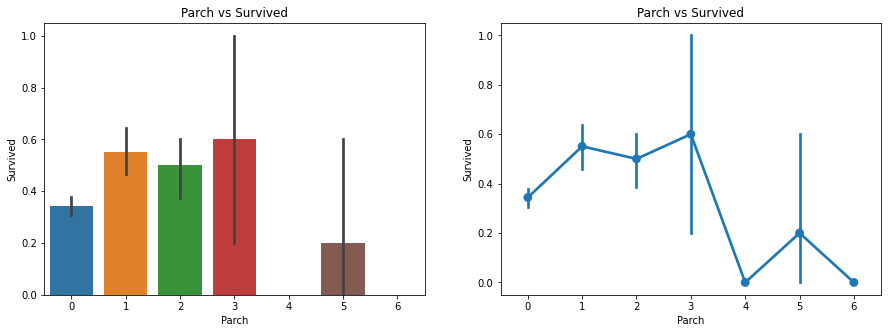

In [ ]:
#부모와 자식이 3명이 있는 승객의 생존율이 가장 높은 것을 확인할 수 있다.
#Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. 
#It however reduces as the number goes up.

#The chances of survival is good for somebody who has 1-3 parents on the ship. 
#Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

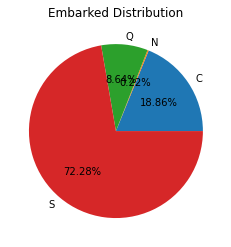

In [ ]:
# 16. 승선한 항구(Embarked 컬럼)에 따른 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 'N'으로 마킹하시오.)

edata = data.Embarked.fillna('N')
#edata.isnull().value_counts()

evc = edata.value_counts().sort_index()
plt.pie(evc.values, labels=evc.index, autopct="%.2f%%")
plt.title("Embarked Distribution")
plt.show()

In [ ]:
evc = edata.value_counts().sort_index()
evc

C    168
N      2
Q     77
S    644
Name: Embarked, dtype: int64

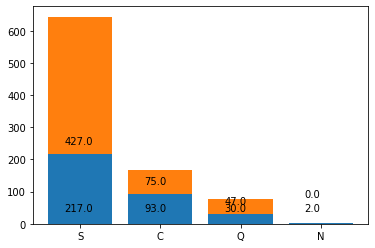

In [ ]:
# 17. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

embarked_values = ['S', 'C', 'Q', 'N'] #evc.index 로 확인
en = 4
# en = len(edata.unique()) #승선한 항구 수
ec_alive_arr = np.zeros(en)
ec_dead_arr = np.zeros(en)

def get_embark_index(embarked):
  for index,ev in enumerate(embarked_values):
    if ev == embarked:
      return index

#함수 실행 체크
#i=4
#print(edata[i],get_embark_index(edata[i]))

for i,embarked in enumerate(edata):
  ei = get_embark_index(embarked)
  if sur_data[i]==0:
    ec_dead_arr[ei]+=1
  else:
    ec_alive_arr[ei]+=1

plt.bar(embarked_values,ec_alive_arr)
plt.bar(embarked_values,ec_dead_arr,bottom=ec_alive_arr)
for i in range(4):
  plt.annotate(str(ec_alive_arr[i]),(-0.2+i,40))
  if pc_alive_arr[i]<40:
    plt.annotate(str(ec_dead_arr[i]),(-0.2+i,ec_alive_arr[i]+80))
  else:
    plt.annotate(str(ec_dead_arr[i]),(-0.2+i,ec_alive_arr[i]+30))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


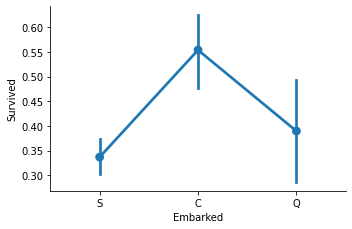

In [ ]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

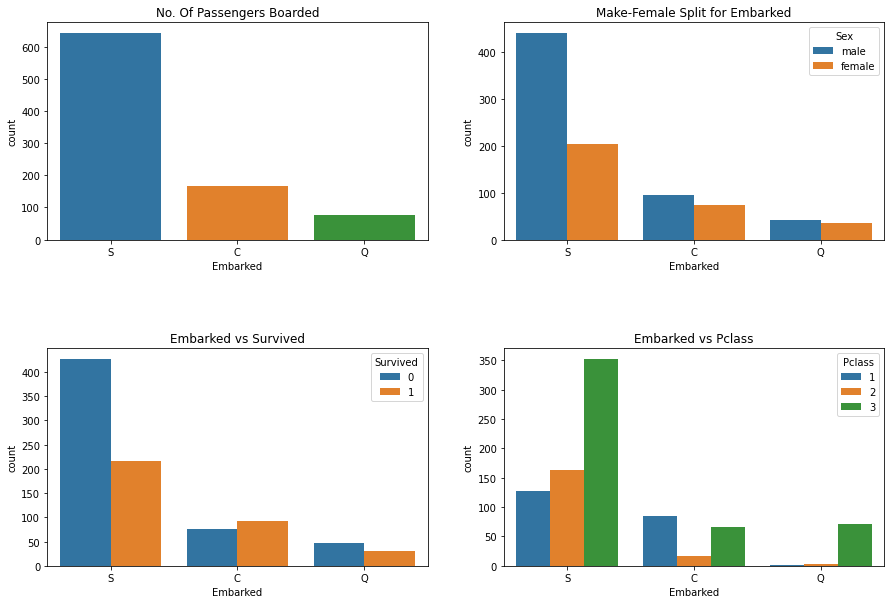

In [ ]:
#S에서 탄 승객수가 가장 많으며 S에서는 남성이 400명 이상, 여성이 200명 정도, 
#S에서 탄 승객의 사망자수가 가장 높으며, S에서 탄 승객들은 3등급 객실에 가장 많이 탄것을 확인 할 수 있다.

f,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Make-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


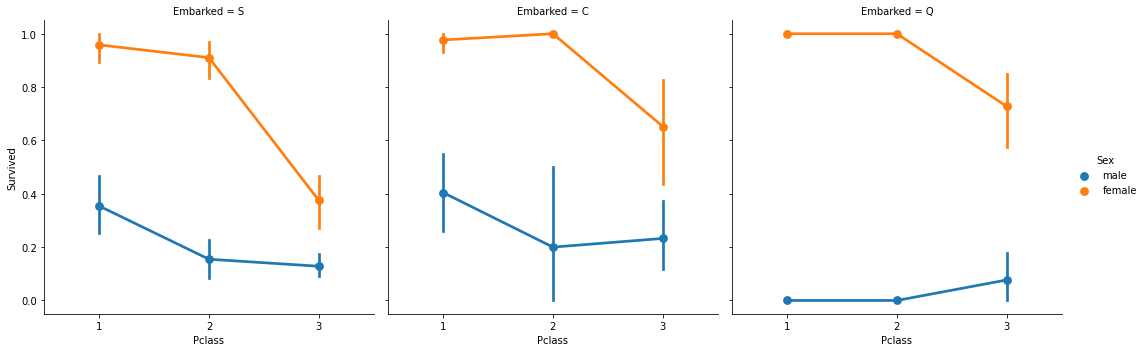

In [ ]:
#S에서 탄 승객 중 1,2등급 객실에 탄 여성 승객은 생존율이 높으며, 
#C에서 탄 승객 중 1,2등급 객실에 탄 여성 승객의 생존율이 높은 것을 알 수 있다. 
#Q에서 탄 여성 승객 역시 마찬가지이다.

sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data,figsize=(13,8))
plt.show()

#많은 승객들이 S에서 승선한것을 알 수 있기 때문에 Embarked에 Null인 데이터는 S에서 승선한것으로 채워넣어볼 수 있다.
#data['Embarked'].fillna('S',inplace=True)

#https://www.kaggle.com/ash316/eda-to-prediction-dietanic
#케글 참고

평균, MSE, 벡터,행렬,중심경향성,산포도,상관관계,심슨의 역설,종속성과 독립성, 조건부 확률, 베이즈, 확률 변수, 연속 분포, 정규 분포, 중심 극한 정리, 통계적 가설 검정, p-value, ,신뢰구간, p 해킹, A/B 테스트, 경사하강법, KNN, KMeans, 로지스틱 회귀